In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import Riesz as R
from pykeops.torch import kernel_product, Genred
from pykeops.torch.kernel_product.formula import *

use_cuda = 1
torchdeviceId = torch.device('cuda:0') if use_cuda else 'cpu'
torchdtype = torch.float32
use_keops=True
import Riesz as R
s=2
RS=R.RieszSearcher(s)

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/pykeops/torch/kernel_product/__init__.py:6: DeprecationWarning: [pyKeOps]: the kernel_product syntax is deprecated. Please consider using the LazyTensor helper instead.
  DeprecationWarning,


In [2]:
d=2 
N=1000
max_iter=401
epsilon= .00001
alpha=1/((d*N)**2) #This is just a guess for the learning rate
cnf= np.random.rand(d+1,N)-.5
cnf = R.proj(cnf)
x = torch.from_numpy(cnf).requires_grad_()

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


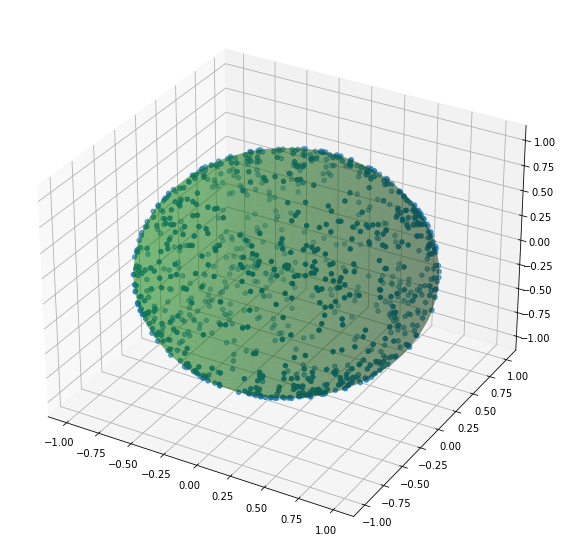

0 2703693.0 0.7162536382675171
1 2456177.75 0.10077252984046936
2 2127167.0 0.1546708643436432
3 2013115.25 0.05665435642004013
4 1965492.75 0.024229293689131737
5 1921460.0 0.022916298359632492
6 1901658.0 0.010413018986582756
7 1889082.875 0.006656735669821501
8 1871926.375 0.009165157563984394
9 1860775.25 0.005992730613797903
10 1851405.125 0.0050610885955393314
11 1843042.25 0.004537538625299931
12 1835476.375 0.0041220225393772125
13 1828564.0 0.003780220402404666
14 1822199.875 0.0034925504587590694
15 1816303.625 0.0032462908420711756
16 1810812.5 0.0030324095860123634
17 1805675.75 0.0028447797521948814
18 1800852.25 0.002678454155102372
19 1796307.75 0.002529911696910858
20 1792013.5 0.002396326744928956
21 1787945.0 0.0022755174431949854
22 1784081.625 0.0021654698066413403
23 1780405.125 0.002064979402348399
24 1776899.875 0.0019726771861314774
25 1773552.375 0.0018874548841267824
26 1770350.25 0.0018087523058056831
27 1767283.0 0.0017355737509205937
28 1764341.25 0.0016673

230 1652809.0 3.8948845030972734e-05
231 1652745.25 3.8572186895180494e-05
232 1652682.375 3.804421430686489e-05
233 1652620.25 3.7591817090287805e-05
234 1652559.125 3.698808723129332e-05
235 1652498.625 3.661122536868788e-05
236 1652439.125 3.600737909437157e-05
237 1652380.0 3.578172254492529e-05
238 1652321.875 3.517777076922357e-05
239 1652264.5 3.472506796242669e-05
240 1652207.75 3.4347980545135215e-05
241 1652151.75 3.3895190426846966e-05
242 1652096.5 3.344235665281303e-05
243 1652041.875 3.306514190626331e-05
244 1651987.75 3.276356073911302e-05
245 1651934.5 3.2234933314612135e-05
246 1651882.0 3.1781932193553075e-05
247 1651830.0 3.1480238249059767e-05
248 1651778.5 3.1178515200736e-05
249 1651727.75 3.072540130233392e-05
250 1651677.75 3.0272249205154367e-05
251 1651628.25 2.9970424293424003e-05
252 1651579.25 2.966857391584199e-05
253 1651530.875 2.9291006285347976e-05
254 1651483.25 2.8837712306994945e-05
255 1651435.875 2.8687156373052858e-05
256 1651389.25 2.8233804187

In [3]:
RS.plot(x)
x = torch.from_numpy(cnf).to(dtype=torchdtype, device=torchdeviceId)
new_x,energy,dic,enr_dic=RS.pgd(x,max_iter,epsilon,alpha,display=10)

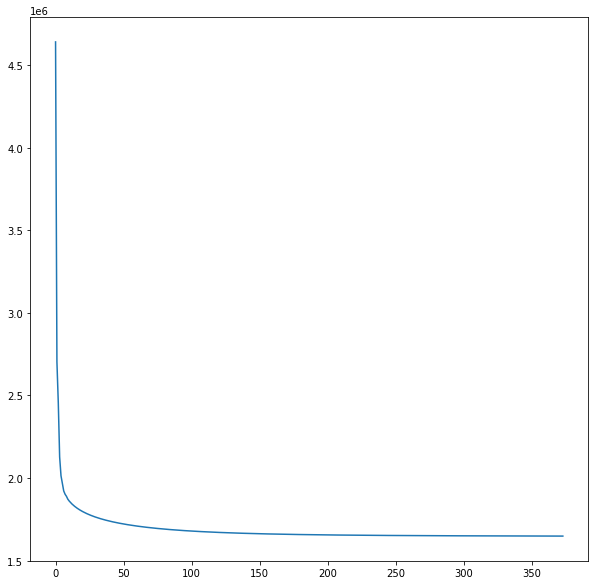

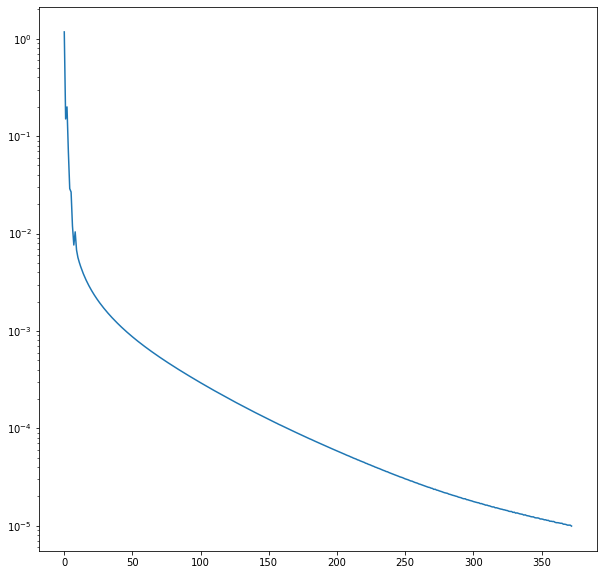

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(enr_dic)
plt.show()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_yscale('log')
ax.plot((enr_dic[0:-1]-enr_dic[1:])/enr_dic[-1])
plt.show()

/home/emanuel/anaconda3/envs/varidist/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


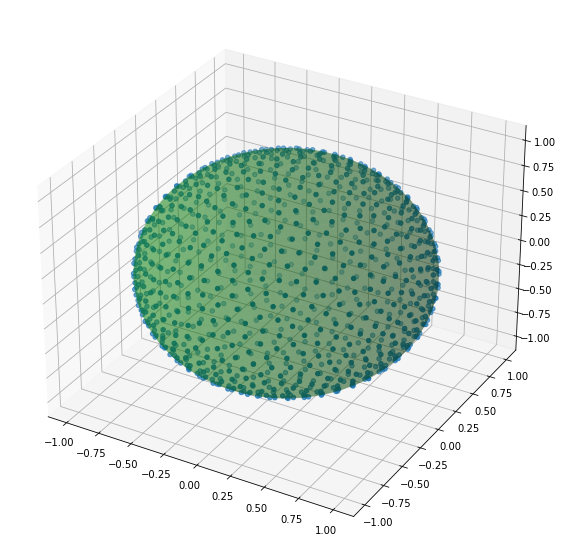

In [5]:
RS.plot(new_x)